# Instacart Dataset

# Instacart is a grocery delivery platform where customers can place a grocery order and have it delivered to them, similar to how Uber Eats and Door Dash work. I've been tasked to clean up the data and prepare a report that gives insight into the shopping habits of Instacart customers.

In [1]:
import pandas as pd

In [2]:
df_orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')

In [3]:
df_products = pd.read_csv('/datasets/products.csv', sep=';')

In [4]:
df_order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

In [5]:
df_aisles = pd.read_csv('/datasets/aisles.csv', sep=';')

In [6]:
df_departments = pd.read_csv('/datasets/departments.csv', sep=';')

In [7]:
print('Instacart Orders:')
print(df_orders.info())
print()
print('Products')
print(df_products.info())
print()
print('Order Products')
print(df_order_products.info(show_counts=True))
print()
print('Aisles')
print(df_aisles.info())
print()
print('Department')
print(df_departments.info())

Instacart Orders:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None

Products
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: 

## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [8]:
# Check for duplicated orders
print(df_orders.duplicated().sum())

15


In [9]:
display(df_orders['order_dow'].value_counts())

0    84090
1    82185
2    65833
5    63488
6    62649
3    60912
4    59810
Name: order_dow, dtype: int64

In [10]:
# Also the values I can assume represent the hour of the day using a 24 hour format, (0 = 12:00 am), (23 = 11:00pm)
# Maybe I should rename them for readability?
display(df_orders['order_hour_of_day'].value_counts())

10    40578
11    40032
15    39789
14    39631
13    39007
16    38112
12    38034
9     35896
17    31930
18    25510
8     25024
19    19547
20    14624
7     13043
21    11019
22     8512
23     5611
6      4215
0      3180
1      1763
5      1371
2      1004
3       770
4       765
Name: order_hour_of_day, dtype: int64

In [11]:
# Check for all orders placed Wednesday at 2:00 AM
wed_2am_orders = df_orders[(df_orders['order_dow'] == 3) & (df_orders['order_hour_of_day'] == 2)]
display(wed_2am_orders)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


In [12]:
# Remove duplicate orders
df_orders = df_orders.drop_duplicates()

In [13]:
# Double check for duplicate rows
print(df_orders.duplicated().sum())

0


In [14]:
# Double check for duplicate order IDs only
print(df_orders['order_id'].duplicated().sum())

0


### `products` data frame

In [15]:
# Check for fully duplicate rows
print(df_products.duplicated().sum())

0


In [16]:
# Check for just duplicate product IDs
print(df_products['product_id'].duplicated().sum())

0


In [17]:
# Check for just duplicate product names (convert names to lowercase to compare better)
print(df_products['product_name'].str.lower().duplicated().sum())

1361


In [18]:
# Check for duplicate product names that aren't missing
display(df_products[df_products['product_name'].duplicated() & ~df_products['product_name'].isna()])

,product_id,product_name,aisle_id,department_id


### `departments` data frame

In [19]:
display(df_departments)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [20]:
# checking for any duplicates
display(df_departments.duplicated().sum())

0

### `aisles` data frame

In [21]:
display(df_aisles)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [22]:
print(df_aisles.duplicated().sum())

0


### `order_products` data frame

In [23]:
# Check for fullly duplicate rows
print(df_order_products.duplicated().sum())

0


In [24]:
# Double check for any other tricky duplicates
print(df_order_products.duplicated(subset=['order_id', 'product_id']).sum())

0


## Find and remove missing values


### `products` data frame

In [25]:
display(df_products)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [26]:
print(df_products.isna().sum())

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64


In [27]:
# Are all of the missing product names associated with aisle ID 100?
# Yes: The number of rows match the number of missing product names.
aisle_100 = df_products.query('aisle_id == 100')
display(aisle_100.isna().sum())

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

In [28]:
# Are all of the missing product names associated with department ID 21?
# Yes : The number of rows match the number of missing product names.
department_21 = df_products.query('department_id == 21')
display(department_21.isna().sum())

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

In [29]:
# What is this ailse and department?
display(df_aisles[df_aisles['aisle_id'] == 100])
print()
display(df_departments[df_departments['department_id'] == 21])

,aisle_id,aisle
99,100,missing


,department_id,department
20,21,missing


In [30]:
# Fill missing product names with 'Unknown'
df_products['product_name'] = df_products['product_name'].fillna('Unknown')

In [31]:
# Double checking for missing values.
print(df_products.isna().sum())

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64


### `orders` data frame

In [32]:
display(df_orders)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


In [33]:
# Are there any missing values where it's not a customer's first order?
# No: There are no missing values with customers who placed more than one order.
df_not_customer_first_order = df_orders.query('order_number > 1')
print(df_not_customer_first_order.isna().sum())

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


### `order_products` data frame

In [34]:
display(df_order_products)

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


In [35]:
# What are the min and max values in this column?
print('The mininmum number of items added to the cart is', df_order_products['add_to_cart_order'].min())
print('The maxiumum number of items added to the cart is', df_order_products['add_to_cart_order'].max())

The mininmum number of items added to the cart is 1.0
The maxiumum number of items added to the cart is 64.0


In [36]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
at_least_one_missing_value = df_order_products[df_order_products['add_to_cart_order'].isna()]
display(at_least_one_missing_value.head(10))

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
34183,844733,32717,NaN,0
57981,61355,5322,NaN,0
58228,936852,31373,NaN,1
62655,264710,40281,NaN,0
64336,1717990,39408,NaN,0


In [37]:
# Do all orders with missing values have more than 64 products?

# Create a list with order_id that have missing add_to_cart
missing_order_id = df_order_products[df_order_products['add_to_cart_order'].isna()]['order_id'].unique()

# You leave rows in df_order_products with order_id in missing_order_id
missing_order_64 = df_order_products.query("order_id in @missing_order_id")

# You group the result by order_id and count product_id
missing_order_64 = missing_order_64.groupby('order_id')['product_id'].count().reset_index(name='total_products')

# Sort the values and check if the first value is greater or less than 64
missing_order_64 = missing_order_64.sort_values(by='total_products')
display(missing_order_64.head(15))

,order_id,total_products
0,9310,65
13,747668,65
32,1598369,65
37,1677118,65
50,2170451,65
18,888470,65
58,2652650,65
60,2729254,65
56,2621907,65
6,180546,66


In [38]:
# Replace missing values with 999 and convert column to integer type
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(999)
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype('int')

# Checking if changes where applied correctly
display(df_order_products.query('add_to_cart_order == 999').head(10))
print('\n')
print('Total number of missing values: ',df_order_products['add_to_cart_order'].isna().sum())

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,999,0
9926,1968313,43867,999,0
14394,2926893,11688,999,0
16418,1717990,4142,999,0
30114,1959075,42828,999,1
34183,844733,32717,999,0
57981,61355,5322,999,0
58228,936852,31373,999,1
62655,264710,40281,999,0
64336,1717990,39408,999,0




Total number of missing values:  0


# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [39]:
print(df_orders['order_hour_of_day'].unique())
print(df_orders['order_dow'].unique())

[13 12 19 20 11  8 18 15 16  9 22 10  0 14 17  1  7  6  2 21  3 23  5  4]
[6 5 0 4 3 1 2]


### [A2] What time of day do people shop for groceries?

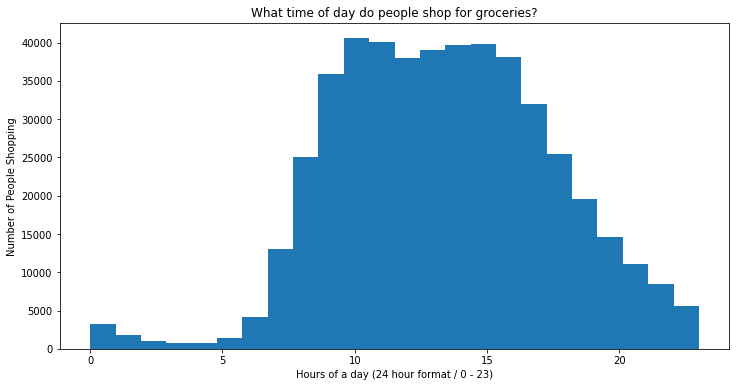

In [40]:
from matplotlib import pyplot as plt

df_orders['order_hour_of_day'].plot(
    title = 'What time of day do people shop for groceries?',
    figsize=(12,6),
    kind = 'hist',
    bins = 24
)
plt.xlabel('Hours of a day (24 hour format / 0 - 23)')
plt.ylabel('Number of People Shopping')
plt.show()

### Based on these results, people tend to shop between the hours of 9am - 5pm.

### [A3] What day of the week do people shop for groceries?

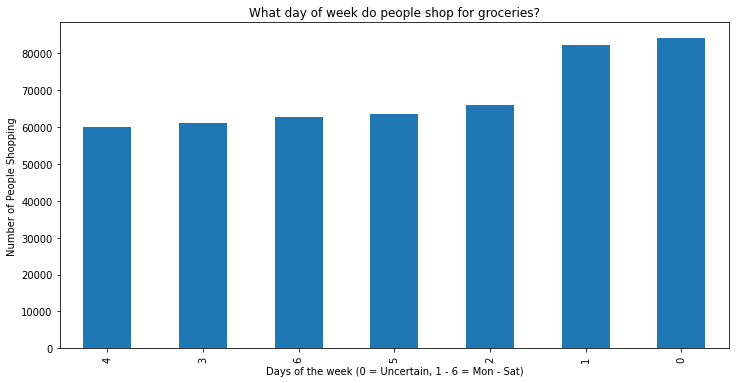

In [41]:
df_orders['order_dow'].value_counts(ascending=True).plot(
    title = 'What day of week do people shop for groceries?',
    ylabel = 'Number of People Shopping',
    xlabel = 'Days of the week (0 = Uncertain, 1 - 6 = Mon - Sat)',
    figsize=(12,6),
    kind = 'bar'
    
)
plt.show()

### Based on the results, Mondays and days that wasn't captured during the gathering of this data are when most people place orders. If 0 - 6 represent the days of the week then 0 could be Sunday and 1 represents Monday.  I can assume this is because its more practical to get your shopping done early during the week, so that it can possibly last an entire week.

### [A4] How long do people wait until placing another order?

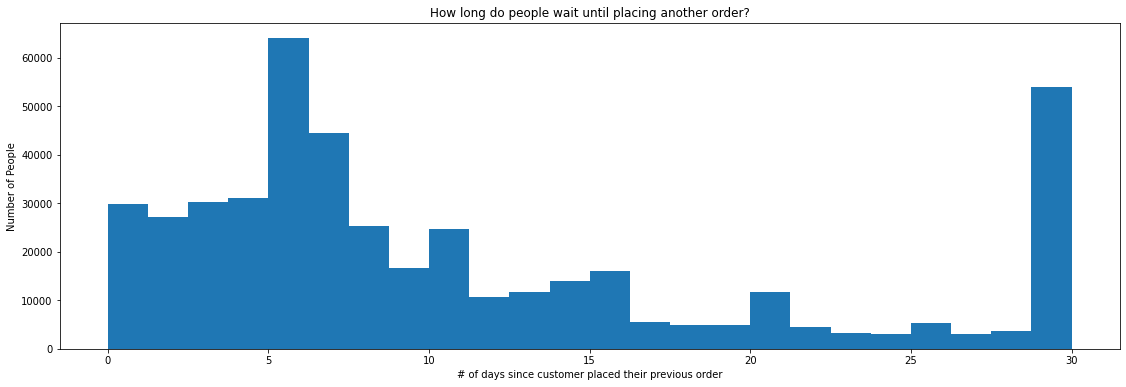

In [42]:
df_orders['days_since_prior_order'].plot(
    title='How long do people wait until placing another order?',
    figsize=(19,6),
    kind='hist',
    bins = 24
)
plt.xlabel('# of days since customer placed their previous order')
plt.ylabel('Number of People')
plt.show()

### Some people wait just around a week until their next order which make since for most cases if you tend to only buy a week worth of food at a time or/and its when the customers normally recieve their paychecks. But majority of the customers wait a month until their next order is placed. I can only assume the reason for this difference between waiting 7 days and 30 days being the because of the size of groceries being order. If your waiting 7 days until your next order then your doing a full restock of your daily meals and items. Therefore if your waiting a full 30 days your only placing small orders over time. This could also point out to the customer's household size. 7 days might be your customers who have families and 30 days could be customers who have less amount of mouth's to feed. 

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [43]:
df_wednesdays = df_orders[df_orders['order_dow'] == 3]

In [44]:
df_saturdays = df_orders[df_orders['order_dow'] == 6]

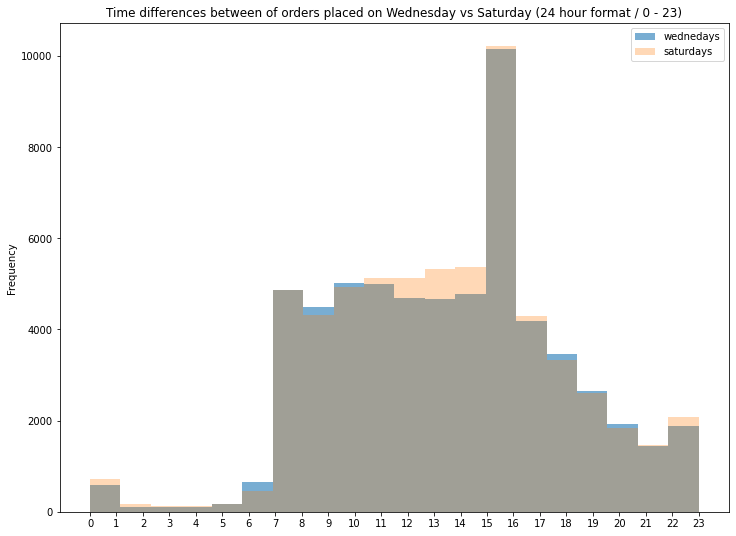

In [45]:
_title = 'Time differences between of orders placed on Wednesday vs Saturday (24 hour format / 0 - 23)'
x_marks = df_orders['order_hour_of_day'].nunique()

x = []
for i in range(x_marks):
    x.append(i)

df_wednesdays['order_hour_of_day'].plot(
    kind='hist', 
    bins=20, 
    alpha=0.6, 
    title=_title, 
    xticks=x, 
    figsize=(12,9)
)
df_saturdays['order_hour_of_day'].plot(kind='hist', bins=20, alpha=0.3)

plt.legend(['wednedays', 'saturdays'])
plt.show()

### There isnt much difference between the 2 days. Between 10am and 3pm Saturdays see more of a pop during this time but it isnt by much.

### [B2] What's the distribution for the number of orders per customer?

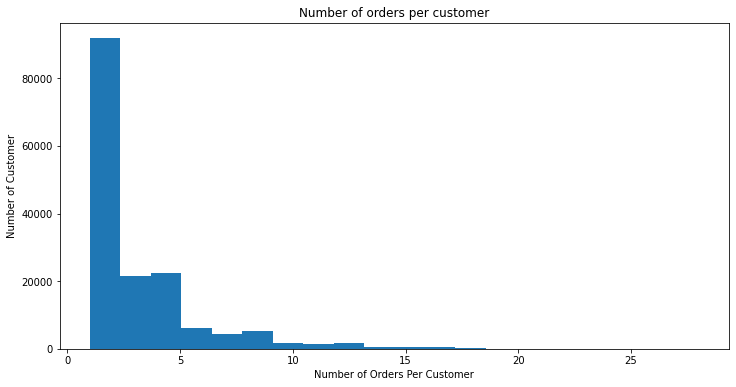

In [46]:
df = df_orders.groupby('user_id')['order_id'].count()
df.plot(kind='hist', bins=20, figsize=(12,6), title='Number of orders per customer')
plt.xlabel('Number of Orders Per Customer')
plt.ylabel('Number of Customer')
plt.show()

### The distribution tends to lean towards customer having 1 - 5 orders .

### [B3] What are the top 20 popular products (display their id and name)?

In [47]:
merged_df = pd.merge(df_order_products, df_products, on='product_id')

In [48]:
# I'm using the reset_index() with size() to convert the grouped data back into a df with a new column name
#'popularity' with holds the number of occurrences of each product.  

popular_products = merged_df.groupby(['product_id', 'product_name']).size().reset_index(name='popularity')

In [49]:
# Sorting in descending order so the top products are at the top.

top_20_products = popular_products.sort_values(by='popularity', ascending=False)
display(top_20_products.head(20))

,product_id,product_name,popularity
22808,24852,Banana,66050
12025,13176,Bag of Organic Bananas,53297
19370,21137,Organic Strawberries,37039
20077,21903,Organic Baby Spinach,33971
43271,47209,Organic Hass Avocado,29773
43788,47766,Organic Avocado,24689
43663,47626,Large Lemon,21495
15364,16797,Strawberries,20018
24047,26209,Limes,19690
25556,27845,Organic Whole Milk,19600


# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [50]:
merged_df = pd.merge(df_orders, df_order_products, on='order_id')
display(merged_df.head(20))

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,1515936,183418,11,6,13,30.0,19048,1,1
1,1515936,183418,11,6,13,30.0,47766,3,1
2,1515936,183418,11,6,13,30.0,45066,9,0
3,1515936,183418,11,6,13,30.0,24082,11,0
4,1515936,183418,11,6,13,30.0,24363,4,0
5,1515936,183418,11,6,13,30.0,36792,2,1
6,1515936,183418,11,6,13,30.0,29270,5,1
7,1515936,183418,11,6,13,30.0,43352,10,0
8,1515936,183418,11,6,13,30.0,28553,7,1
9,1515936,183418,11,6,13,30.0,24852,8,1


In [51]:
typical_num_of_item_per_order = merged_df.groupby('order_id')['product_id'].count()
display(typical_num_of_item_per_order.head(20))

order_id
4      13
9      15
11      5
19      3
20      8
31     10
48      8
56     10
61     12
68      9
75     16
80      7
81     11
83     14
99      7
114    10
131    18
142     7
143    25
148    14
Name: product_id, dtype: int64

In [52]:
item_counts = typical_num_of_item_per_order.value_counts().sort_index()

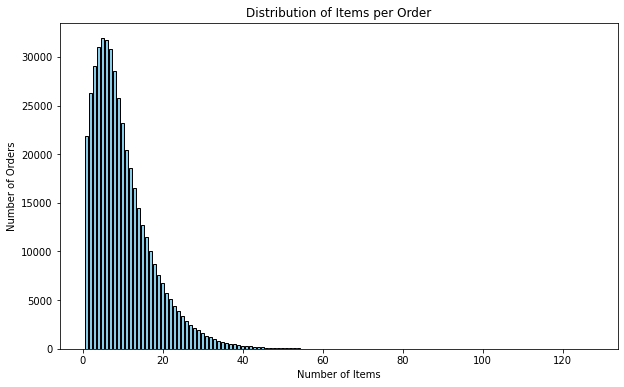

In [53]:
plt.figure(figsize=(10,6))
plt.bar(
    item_counts.index,
    item_counts.values,
    color='skyblue',
    edgecolor='black',
)
plt.title('Distribution of Items per Order')
plt.xlabel('Number of Items')
plt.ylabel('Number of Orders')
plt.show()

### Based of this chart customers tend to purchase between 3 - 8 items per order.

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [54]:
reordered_items = df_order_products[df_order_products['reordered'] == 1].groupby('product_id')['reordered'].count().reset_index(name='reordered_count')
display(reordered_items.head(20))

,product_id,reordered_count
0,1,158
1,3,31
2,4,25
3,7,1
4,8,6
5,9,16
6,10,151
7,11,10
8,12,16
9,13,1


In [55]:
reordered_items = pd.merge(reordered_items, df_products[['product_id', 'product_name']], on='product_id')
display(reordered_items.sample(20))

,product_id,reordered_count,product_name
18385,25247,14,Dubliner Cheddar
34175,46883,1,Snacks Restaurant Style White Corn Tortilla Chips
6227,8607,28,Mango Slices
9377,12982,5,Granny Smith Apple Fruit Chips
14513,19945,14,G Series Perform Orange Flavor Sports Drink
28947,39748,50,Organic Whole Grain Infant Oatmeal Cereal with...
33621,46128,5,Prime Filets with Salmon & Beef in Sauce Cat Food
23580,32387,64,Roasted Garlic & Sweet Basil Sauce
13044,17957,109,Organic Applesauce
7433,10301,58,Dark Chocolate Cherry Chia Bar


In [56]:
top_reordered_products = reordered_items.sort_values(by='reordered_count', ascending=False).head(20)
display(top_reordered_products[['product_id', 'product_name', 'reordered_count']])

,product_id,product_name,reordered_count
18104,24852,Banana,55763
9528,13176,Bag of Organic Bananas,44450
15368,21137,Organic Strawberries,28639
15936,21903,Organic Baby Spinach,26233
34407,47209,Organic Hass Avocado,23629
34828,47766,Organic Avocado,18743
20285,27845,Organic Whole Milk,16251
34725,47626,Large Lemon,15044
20375,27966,Organic Raspberries,14748
12193,16797,Strawberries,13945


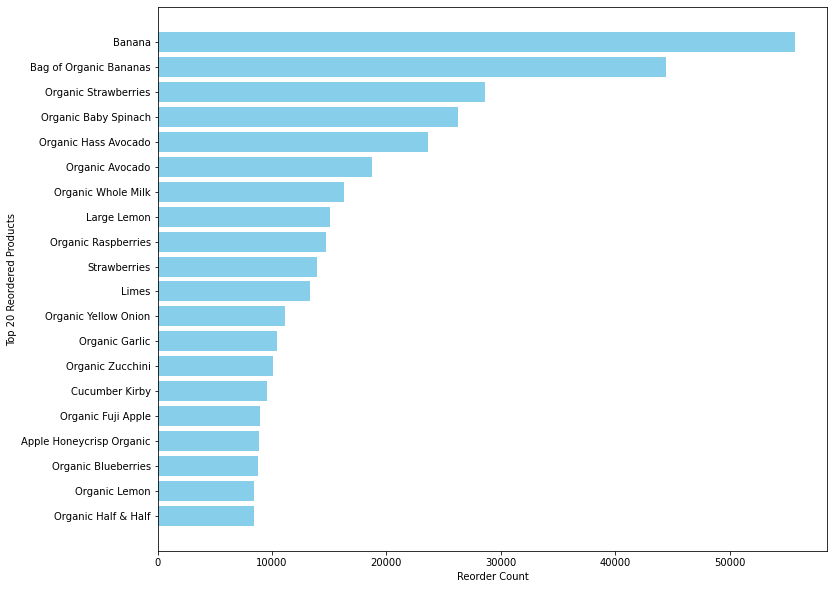

In [57]:
plt.figure(figsize=(12,10))
plt.barh(top_reordered_products['product_name'], top_reordered_products['reordered_count'], color='skyblue')
plt.xlabel('Reorder Count')
plt.ylabel('Top 20 Reordered Products')
plt.gca().invert_yaxis() # So we can have the highest count on top.
plt.show()

### [C3] For each product, what proportion of its orders are reorders?

In [58]:
# Calculate the total number of orders for each product
product_order_counts = df_order_products.groupby('product_id')['order_id'].nunique().reset_index(name='total_orders')

# Calculate the total number of reorder orders for each product
product_reorder_counts = df_order_products[df_order_products['reordered'] == 1].groupby('product_id')['order_id'].nunique().reset_index(name='reorder_orders')

# Merge the 2 df counts using 'product_id' as the key. I choose to merge on 'left' to ensure that all products are included even if they have no reorder orders.
product_reorder_ratio = pd.merge(product_order_counts, product_reorder_counts, on='product_id', how='left')

# Calculate the reorder ratio by dividing the reorder_orders by total_orders. The reorder ratio represents the proportion of reorder orders out of the total orders for a certain product.
product_reorder_ratio['reorder_ratio'] = product_reorder_ratio['reorder_orders'] / product_reorder_ratio['total_orders']

# Merge with Product Names from 'df_products' based on 'product_id'.
product_reorder_ratio = pd.merge(product_reorder_ratio, df_products[['product_id', 'product_name']], on='product_id')

product_reorder_ratio = product_reorder_ratio.fillna(0)

display(product_reorder_ratio.sample(20))

,product_id,total_orders,reorder_orders,reorder_ratio,product_name
36283,39590,11,6.0,0.545455,Light Bologna
27182,29630,2,2.0,1.000000,Ultra Black Energy Drink
26001,28331,45,28.0,0.622222,Chicken Stew Natural Food for Dogs
477,531,14,8.0,0.571429,Adult Dog Formula Dog Food
7256,7963,1854,1264.0,0.681769,Gluten Free Whole Grain Bread
25088,27340,4,0.0,0.000000,Popcorn Salt
38984,42538,39,19.0,0.487179,Organic Applesauce Apple Pouch
42304,46152,2,1.0,0.500000,Lemon Dishwashing Detergent + Clorox Stain Fig...
19577,21360,20,4.0,0.200000,Clean Comfort Deodorant
6470,7101,6,2.0,0.333333,Low Calorie- Sugar Free Breakfast Syrup


In [59]:
top_20_reorder_ratio = product_reorder_ratio.sort_values(by='reorder_ratio', ascending=False).head(20)
display(top_20_reorder_ratio)

,product_id,total_orders,reorder_orders,reorder_ratio,product_name
13453,14721,1,1.0,1.0,Bone Strength Take Care
19195,20949,3,3.0,1.0,Vanilla Sandwich Cookies
6136,6723,10,10.0,1.0,Palmiers- Petite
6144,6732,3,3.0,1.0,Naturally Sparkling Mineral Water
41319,45088,1,1.0,1.0,California Dill Pollen & Garlic Goat Cheese & ...
41310,45078,1,1.0,1.0,Pomegranatea
19258,21016,1,1.0,1.0,Parchment Lined 8 in x 3.75 in x 2.5 in Pans
19248,21005,2,2.0,1.0,Peanut Butter Pie Ice Cream
32273,35192,2,2.0,1.0,Chocolate Soy Milk Singles
32277,35197,1,1.0,1.0,Mocha Chocolate Chip Organic Non-Dairy Frozen...


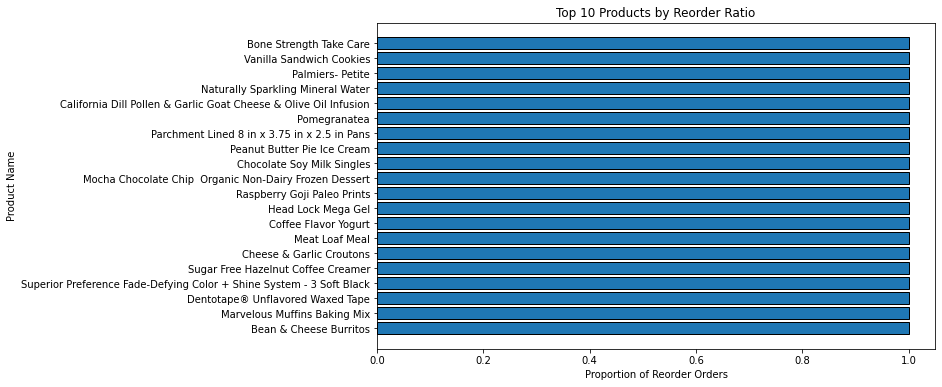

In [60]:
plt.figure(figsize=(10, 6))
plt.barh(top_20_reorder_ratio['product_name'], top_20_reorder_ratio['reorder_ratio'], edgecolor='black')
plt.xlabel('Proportion of Reorder Orders')
plt.ylabel('Product Name')
plt.title('Top 10 Products by Reorder Ratio')
plt.gca().invert_yaxis()
plt.show()

In [61]:
#REVIEWER COMMENT
df_order_products.groupby('product_id')['reordered'].agg(['count', 'sum']).rename(columns = {'count':"total_orders", 'sum':'reordered_orders'})

,total_orders,reordered_orders
product_id,,
1,280,158
2,11,0
3,42,31
4,49,25
7,2,1
...,...,...
49690,5,4
49691,72,31
49692,12,5


### [C4] For each customer, what proportion of their products ordered are reorders?

In [62]:
merged_df = pd.merge(df_order_products, df_orders, on='order_id')
display(merged_df.sample(10))

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
3101457,2149909,3061,6,0,191866,6,2,12,7.0
3664925,1215298,21267,3,1,128927,9,5,10,9.0
2927428,1433483,12357,29,0,6577,16,1,12,4.0
801761,1987759,37524,19,0,55458,20,6,13,15.0
1700764,2377178,16797,1,1,153684,13,5,9,7.0
3102954,1978076,39121,4,1,84411,6,3,11,7.0
562541,1131506,23622,9,0,59214,3,2,21,1.0
2785048,49728,33026,5,1,204069,22,3,8,2.0
2821011,1720588,33806,8,1,117498,17,4,9,5.0
182431,1155993,34896,10,1,133816,20,6,15,16.0


In [63]:
# Calculate the total number of products ordered by each customer.
customer_total_ordered_products = merged_df.groupby('user_id')['product_id'].count().reset_index(name='total_products')

# Calculate the total number of reordered products for each customer.
customer_total_reordered_products = merged_df[merged_df['reordered'] == 1].groupby('user_id')['product_id'].count().reset_index(name='reorder_products')

customer_reorder_ratio = pd.merge(customer_total_ordered_products, customer_total_reordered_products, on='user_id', how='left')
display(customer_reorder_ratio.head(20))

,user_id,total_products,reorder_products
0,2,26,1.0
1,4,2,NaN
2,5,12,8.0
3,6,4,NaN
4,7,14,13.0
5,11,15,3.0
6,12,12,3.0
7,13,23,13.0
8,14,61,22.0
9,15,13,7.0


In [64]:
# Calculate the reorder ratio by dividing the reorder_products by total_products
customer_reorder_ratio['reorder_ratio'] = customer_reorder_ratio['reorder_products'] / customer_reorder_ratio['total_products']
customer_reorder_ratio = customer_reorder_ratio.fillna(0)

display(customer_reorder_ratio.sample(20))

,user_id,total_products,reorder_products,reorder_ratio
84578,116617,49,24.0,0.489796
138319,190741,38,21.0,0.552632
110186,152083,38,27.0,0.710526
70829,97690,7,5.0,0.714286
27253,37658,7,3.0,0.428571
38814,53609,32,7.0,0.218750
23361,32267,91,75.0,0.824176
50882,70257,76,19.0,0.250000
128924,177812,3,3.0,1.000000
69829,96323,25,7.0,0.280000


### [C5] What are the top 20 items that people put in their carts first? 

In [65]:
df_first_ordered_item = df_order_products[df_order_products['add_to_cart_order'] == 1]
display(df_first_ordered_item.head(20))

,order_id,product_id,add_to_cart_order,reordered
1,567889,1560,1,1
2,2261212,26683,1,1
14,1961225,37553,1,1
16,639939,10017,1,1
23,750040,8518,1,0
33,2291457,27104,1,1
43,3075384,28799,1,1
45,1787676,47672,1,1
54,3266094,12763,1,1
56,1594605,34217,1,1


In [66]:
# Calculate the frequency for each product being added first.
first_item_count = df_first_ordered_item['product_id'].value_counts().reset_index()
first_item_count.columns = ['product_id', 'count']

display(first_item_count.head(20))

,product_id,count
0,24852,15562
1,13176,11026
2,27845,4363
3,21137,3946
4,47209,3390
5,21903,3336
6,47766,3044
7,19660,2336
8,16797,2308
9,27966,2024


In [67]:
first_item_count = pd.merge(first_item_count, df_products[['product_id', 'product_name']], on='product_id')

In [68]:
top_20_first_ordered_item = first_item_count.sort_values(by='count', ascending=False).head(20)
display(top_20_first_ordered_item[['product_id', 'product_name', 'count']])

,product_id,product_name,count
0,24852,Banana,15562
1,13176,Bag of Organic Bananas,11026
2,27845,Organic Whole Milk,4363
3,21137,Organic Strawberries,3946
4,47209,Organic Hass Avocado,3390
5,21903,Organic Baby Spinach,3336
6,47766,Organic Avocado,3044
7,19660,Spring Water,2336
8,16797,Strawberries,2308
9,27966,Organic Raspberries,2024


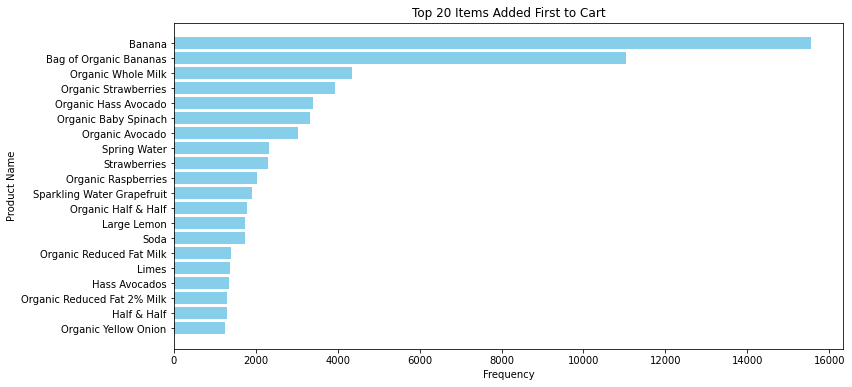

In [69]:
plt.figure(figsize=(12, 6))
plt.barh(top_20_first_ordered_item['product_name'], top_20_first_ordered_item['count'], color='skyblue')
plt.ylabel('Product Name')
plt.xlabel('Frequency')
plt.title('Top 20 Items Added First to Cart')
plt.gca().invert_yaxis()
plt.show()